In [1]:
# IMPORT NECESSARY PACKAGES
import numpy as np
import os
import matplotlib.pyplot as plt
import sys

sys.path.append("../scripts/plotting/")
import utils

# PAARTI
from paarti.utils import maos_utils
from scipy.interpolate import griddata

In [2]:
act_study = "../studies/reduced_ngs/"
act_study7 = "../studies/act_count/"

In [5]:
actuator_count = np.arange(1000, 6000, 250)
actual_lgs_count = np.arange(1, 11)
print(actuator_count[12])

lgs_count = np.arange(7, 11) # Currently
lgs_mag = np.arange(8, 9) # Currently

mag = 8

seed = 1

strehl_ratios = np.zeros((9, len(lgs_count), len(lgs_mag), len(actuator_count)))
wfe = np.zeros((3, len(lgs_count), len(lgs_mag), len(actuator_count)))

4000


In [20]:
for i, act_count in enumerate(actuator_count):
    for j, l_mag in enumerate(lgs_mag):
        for k, l_count in enumerate(lgs_count):
        
            directory_path = os.path.join(act_study, f"{l_count}_lgs/", f"{l_mag}mag_lgs/", f"{act_count}count/")
            directory_file =  os.path.join(directory_path, f"evlpsfcl_1_x0_y0.fits")
    
            if os.path.exists(directory_path):
                print(f"Directory found: {directory_file}.")
            else:
                print(f"Directory NOT found: {directory_file}.")
                continue 
            
            if act_count % 1000 == 0:
                print("Entering directory: ", directory_file)


            psf_metrics_kola = maos_utils.get_psf_metrics_over_field(directory=directory_path, seed=seed)
            wfe_metrics_kola = utils.get_wfe_metrics_over_field(directory=directory_path, seed=seed)
        
            _, _, _, strehl_kola, *_ = psf_metrics_kola
            _, clos_mean_nm, *_ = wfe_metrics_kola
            
            strehl_ratios[:, k, j, i] = strehl_kola[0, :]
        
            wfe[0, k, j, i] = clos_mean_nm[0]
            wfe[1, k, j, i] = clos_mean_nm[1]
            wfe[2, k, j, i] = clos_mean_nm[2]

Directory found: ../studies/reduced_ngs/7_lgs/8mag_lgs/1000count/evlpsfcl_1_x0_y0.fits.
Entering directory:  ../studies/reduced_ngs/7_lgs/8mag_lgs/1000count/evlpsfcl_1_x0_y0.fits
Looking in directory: ../studies/reduced_ngs/7_lgs/8mag_lgs/1000count/
Directory found: ../studies/reduced_ngs/8_lgs/8mag_lgs/1000count/evlpsfcl_1_x0_y0.fits.
Entering directory:  ../studies/reduced_ngs/8_lgs/8mag_lgs/1000count/evlpsfcl_1_x0_y0.fits
Looking in directory: ../studies/reduced_ngs/8_lgs/8mag_lgs/1000count/
Directory NOT found: ../studies/reduced_ngs/9_lgs/8mag_lgs/1000count/evlpsfcl_1_x0_y0.fits.
Directory found: ../studies/reduced_ngs/10_lgs/8mag_lgs/1000count/evlpsfcl_1_x0_y0.fits.
Entering directory:  ../studies/reduced_ngs/10_lgs/8mag_lgs/1000count/evlpsfcl_1_x0_y0.fits
Looking in directory: ../studies/reduced_ngs/10_lgs/8mag_lgs/1000count/
Directory found: ../studies/reduced_ngs/7_lgs/8mag_lgs/1250count/evlpsfcl_1_x0_y0.fits.
Looking in directory: ../studies/reduced_ngs/7_lgs/8mag_lgs/1250cou

TypeError: buffer is too small for requested array

In [5]:
lgs_value = 8.5  # You can adjust this to the specific LGS value
extent_y = [lgs_value - 2, lgs_value + 2] 
print(strehl_kola.shape)

(1, 9)


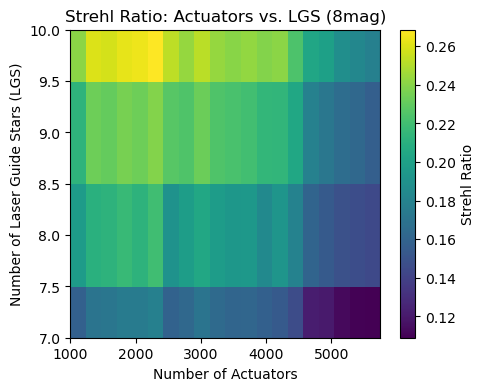

In [6]:
plt.figure(figsize=(5, 4))
plt.imshow(strehl_ratios[2, :, 1, :], extent=[actuator_count.min(), actuator_count.max(), extent_y[0], extent_y[1]], 
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label="Strehl Ratio")
plt.xlabel("Number of Actuators")
plt.ylabel("Number of Laser Guide Stars (LGS)")
plt.title("Strehl Ratio: Actuators vs. LGS (8mag)")
plt.ylim(7, 10)
plt.show()

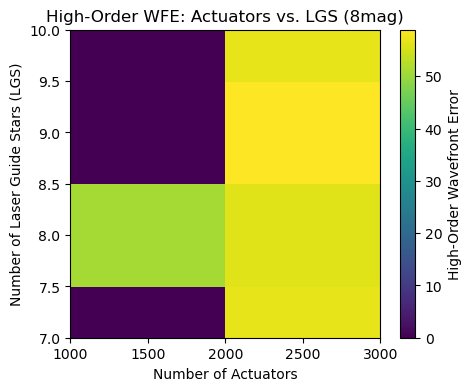

In [7]:
plt.figure(figsize=(5, 4))
plt.imshow(wfe[1, :, :, 0], extent=[actuator_count.min(), 3000, extent_y[0], extent_y[1]], 
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label="High-Order Wavefront Error")
plt.xlabel("Number of Actuators")
plt.ylabel("Number of Laser Guide Stars (LGS)")
plt.title("High-Order WFE: Actuators vs. LGS (8mag)")
plt.ylim(7, 10)
plt.show()

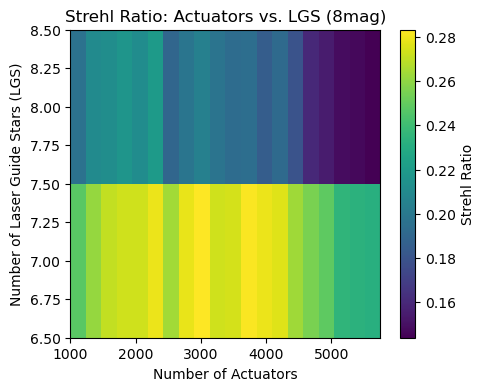

In [8]:
plt.figure(figsize=(5, 4))
plt.imshow(strehl_ratios[2, 1, :, :], extent=[actuator_count.min(), actuator_count.max(), 6.5, 8.5], 
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label="Strehl Ratio")
plt.xlabel("Number of Actuators")
plt.ylabel("Number of Laser Guide Stars (LGS)")
plt.title("Strehl Ratio: Actuators vs. LGS (8mag)")
plt.ylim(6.5, 8.5)
plt.show()

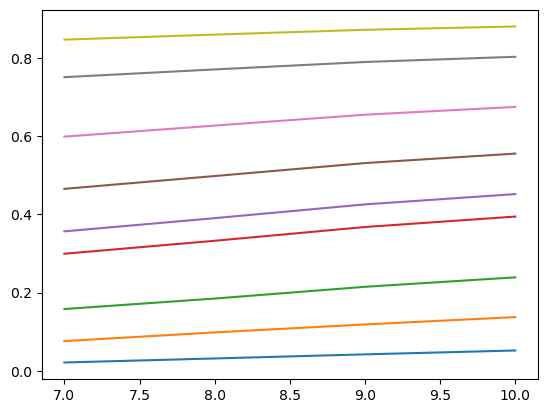

In [11]:
#strehl_ratios = np.zeros((9, len(lgs_count), len(lgs_mag), len(actuator_count)))
for i in range(9):
    plt.plot(lgs_count, strehl_ratios[i, :, 1, 12])

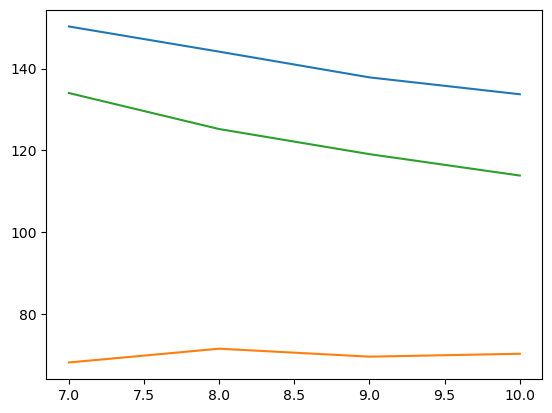

In [10]:
for i in range(3):
    plt.plot(lgs_count, wfe[i, :, 1, 12])